In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
df = pd.read_csv("D://New folder//ML//Completed//pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
types = df['Type 1'].isin(['Grass','Fire','Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary']
df = df[types].drop(columns = drop_cols)
df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60
2,3,Venusaur,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,4,Charmander,309,39,52,43,60,50,65


In [4]:
kmeans = KMeans(n_clusters=3, random_state=3)
df['cluster'] = kmeans.fit_predict(df[['Attack','Defense']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

C:\Users\User\anaconda3\envs\Research\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\Research\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


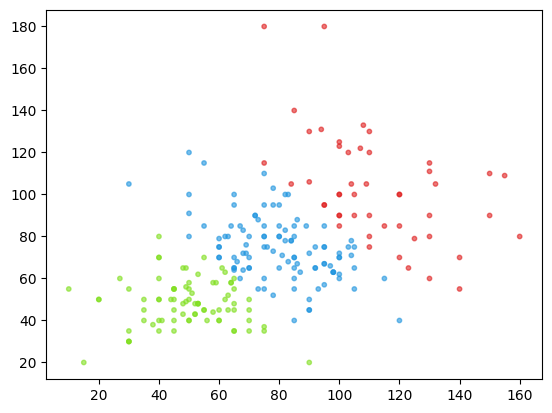

In [5]:
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)

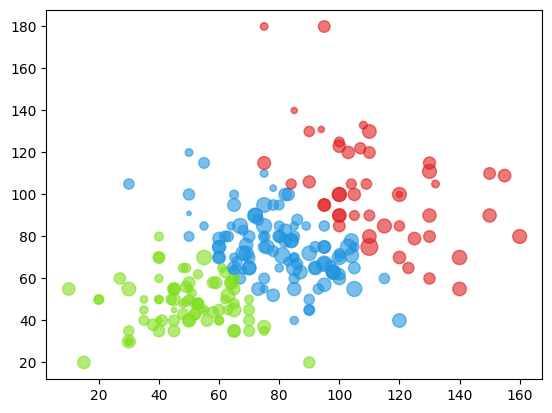

In [6]:
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=df.Speed)

Text(0, 0.5, 'Defense')

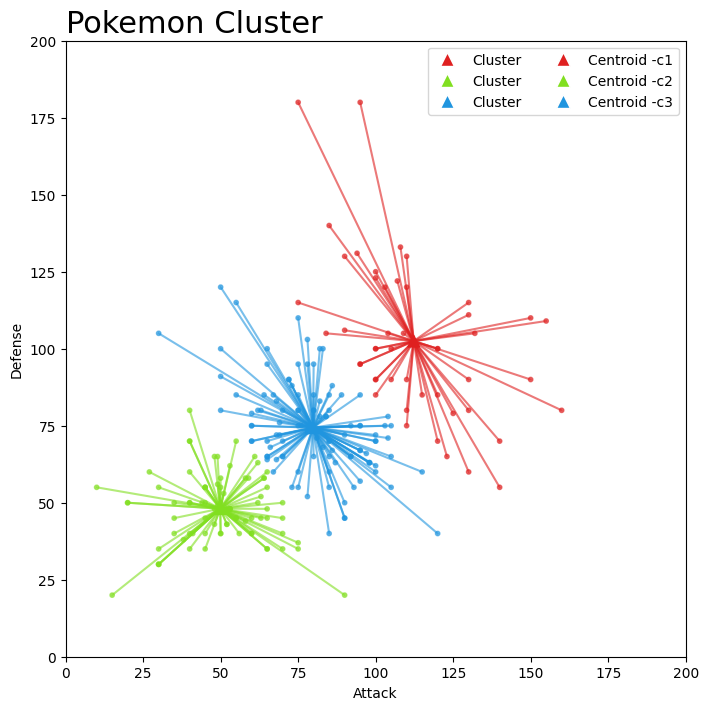

In [15]:
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x]
    y = [val.Defense, val.cen_y]
    plt.plot(x,y,c=val.c, alpha=0.6)

#centroids
cent_leg = [Line2D([0],[0], marker='^', color='w', label='Centroid -c{}'.format(i+1),
                  markerfacecolor=mcolor ,markersize=10) for i, mcolor in enumerate(colors)]

#legend
legend_elements = [Line2D([0],[0], marker='^', color='w', label='Cluster'.format(i+1),
                  markerfacecolor=mcolor ,markersize=10) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0],[0], marker='^', color='w', label='Centroid -c{}'.format(i+1),
                  markerfacecolor=mcolor ,markersize=10) for i, mcolor in enumerate(colors)])

plt.legend(handles=legend_elements, loc='upper right', ncol=2)
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('Pokemon Cluster', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')